In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pycaret

In [2]:
# !pip install pycaret

In [3]:
# os.getcwd()

In [4]:
### Load dataset files

train_bene_df = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
train_ip_df = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
train_op_df = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
train_prv = pd.read_csv('Train-1542865627584.csv')

test_bene_df = pd.read_csv('Test_Beneficiarydata-1542969243754.csv')
test_ip_df = pd.read_csv('Test_Inpatientdata-1542969243754.csv')
test_op_df = pd.read_csv('Test_Outpatientdata-1542969243754.csv')
test_prv = pd.read_csv('Test-1542969243754.csv')

In [5]:
# !pip install pycaret[full]

In [6]:
train_bene_df

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [7]:
train_bene_df.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [8]:
train_bene_df.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [9]:
train_bene_df.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [10]:
train_bene_df[['DOD', 'DOB']] = train_bene_df[['DOD', 'DOB']].apply(pd.to_datetime)
test_bene_df[['DOD', 'DOB']] = test_bene_df[['DOD', 'DOB']].apply(pd.to_datetime)

In [11]:
train_bene_df['Dead_or_Alive'] = train_bene_df['DOD'].apply(lambda x:0 if pd.isna(x) else 1)
test_bene_df['Dead_or_Alive'] = test_bene_df['DOD'].apply(lambda x:0 if pd.isna(x) else 1)

In [12]:
train_bene_df['Dead_or_Alive'].value_counts()

Dead_or_Alive
0    137135
1      1421
Name: count, dtype: int64

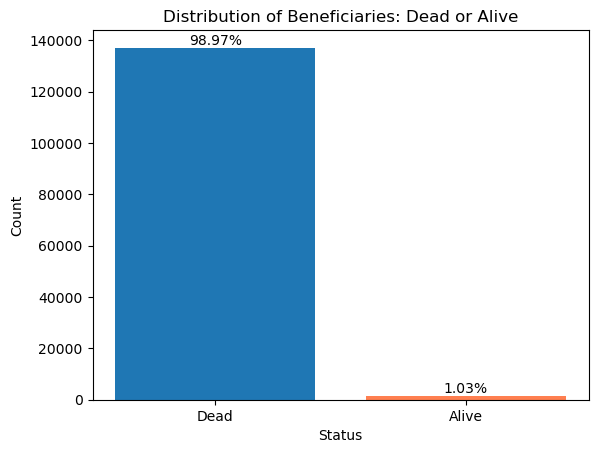

In [13]:
dead_alive_counts = train_bene_df['Dead_or_Alive'].value_counts()

# Calculate percentages
total_count = dead_alive_counts.sum()
percentage_dead = dead_alive_counts[0] / total_count * 100
percentage_alive = dead_alive_counts[1] / total_count * 100

# Create a bar plot
bars = plt.bar(dead_alive_counts.index, dead_alive_counts.values, color=['#1f77b4','coral'])

# Add percentage annotations on top of the bars
for bar, count in zip(bars, dead_alive_counts.values):
    percentage = count / total_count * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', 
             ha='center', va='bottom')

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Beneficiaries: Dead or Alive')

# Add custom x-axis labels
plt.xticks([0, 1], ['Dead', 'Alive'])

# Show plot
plt.show()


In [14]:
train_bene_df['DOD'].unique()

<DatetimeArray>
[                'NaT', '2009-12-01 00:00:00', '2009-09-01 00:00:00',
 '2009-05-01 00:00:00', '2009-07-01 00:00:00', '2009-08-01 00:00:00',
 '2009-10-01 00:00:00', '2009-06-01 00:00:00', '2009-04-01 00:00:00',
 '2009-02-01 00:00:00', '2009-11-01 00:00:00', '2009-03-01 00:00:00']
Length: 12, dtype: datetime64[ns]

In [15]:
train_bene_df['DOD'].max()

Timestamp('2009-12-01 00:00:00')

In [16]:
# Age

train_bene_df['DOD'].fillna(train_bene_df['DOD'].max(),inplace=True)
test_bene_df['DOD'].fillna(test_bene_df['DOD'].max(),inplace=True)

train_bene_df['Age'] = round((train_bene_df['DOD'] - train_bene_df['DOB']).dt.days / 365)
test_bene_df['Age'] = round((test_bene_df['DOD'] - test_bene_df['DOB']).dt.days / 365)

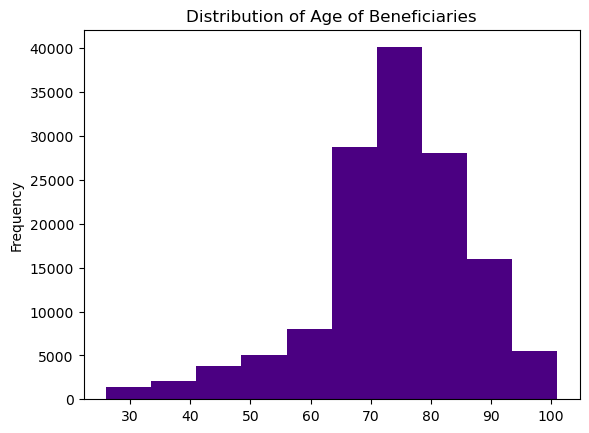

In [17]:
train_bene_df['Age'].plot(kind='hist', color='indigo')
plt.title('Distribution of Age of Beneficiaries')
plt.show()

In [18]:
train_bene_df['Race'].unique()

array([1, 2, 3, 5], dtype=int64)

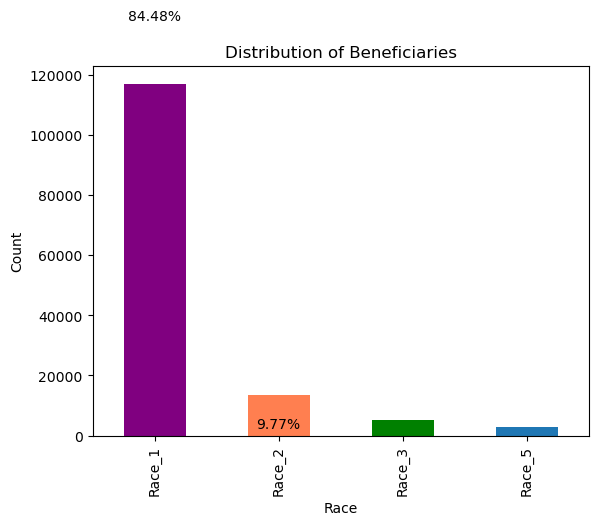

In [19]:
race_counts=train_bene_df['Race'].value_counts()

race_counts.plot(kind='bar', color=['purple','coral', 'green', '#1f77b4'])

# Add percentage annotations on top of the bars
total_count = race_counts.sum()
for bar, count in zip(bars.patches, race_counts):
    percentage = count / total_count * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', 
             ha='center', va='bottom')

# Add labels and title
plt.xticks(labels=["Race_1","Race_2","Race_3","Race_5"], ticks=[0,1,2,3])
plt.ylabel('Count')
plt.title('Distribution of Beneficiaries')

# Show plot
plt.show()

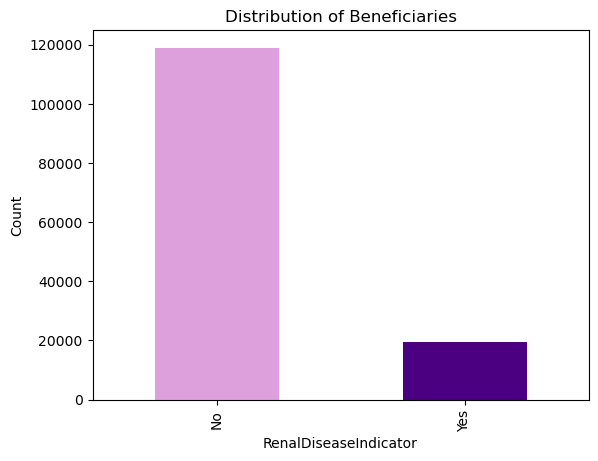

In [20]:
renal_counts=train_bene_df['RenalDiseaseIndicator'].value_counts()
renal_counts.plot(kind='bar', color=['plum','indigo'])

# Add percentage annotations on top of the bars
# total_count = renal_counts.sum()
# for bar, count in zip(bars.patches, renal_counts):
#     percentage = count / total_count * 100
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', 
#              ha='center', va='bottom')

# Add labels and title
plt.xticks(labels=['No','Yes'], ticks=[0,1])
plt.ylabel('Count')
plt.title('Distribution of Beneficiaries')

# Show plot
plt.show()

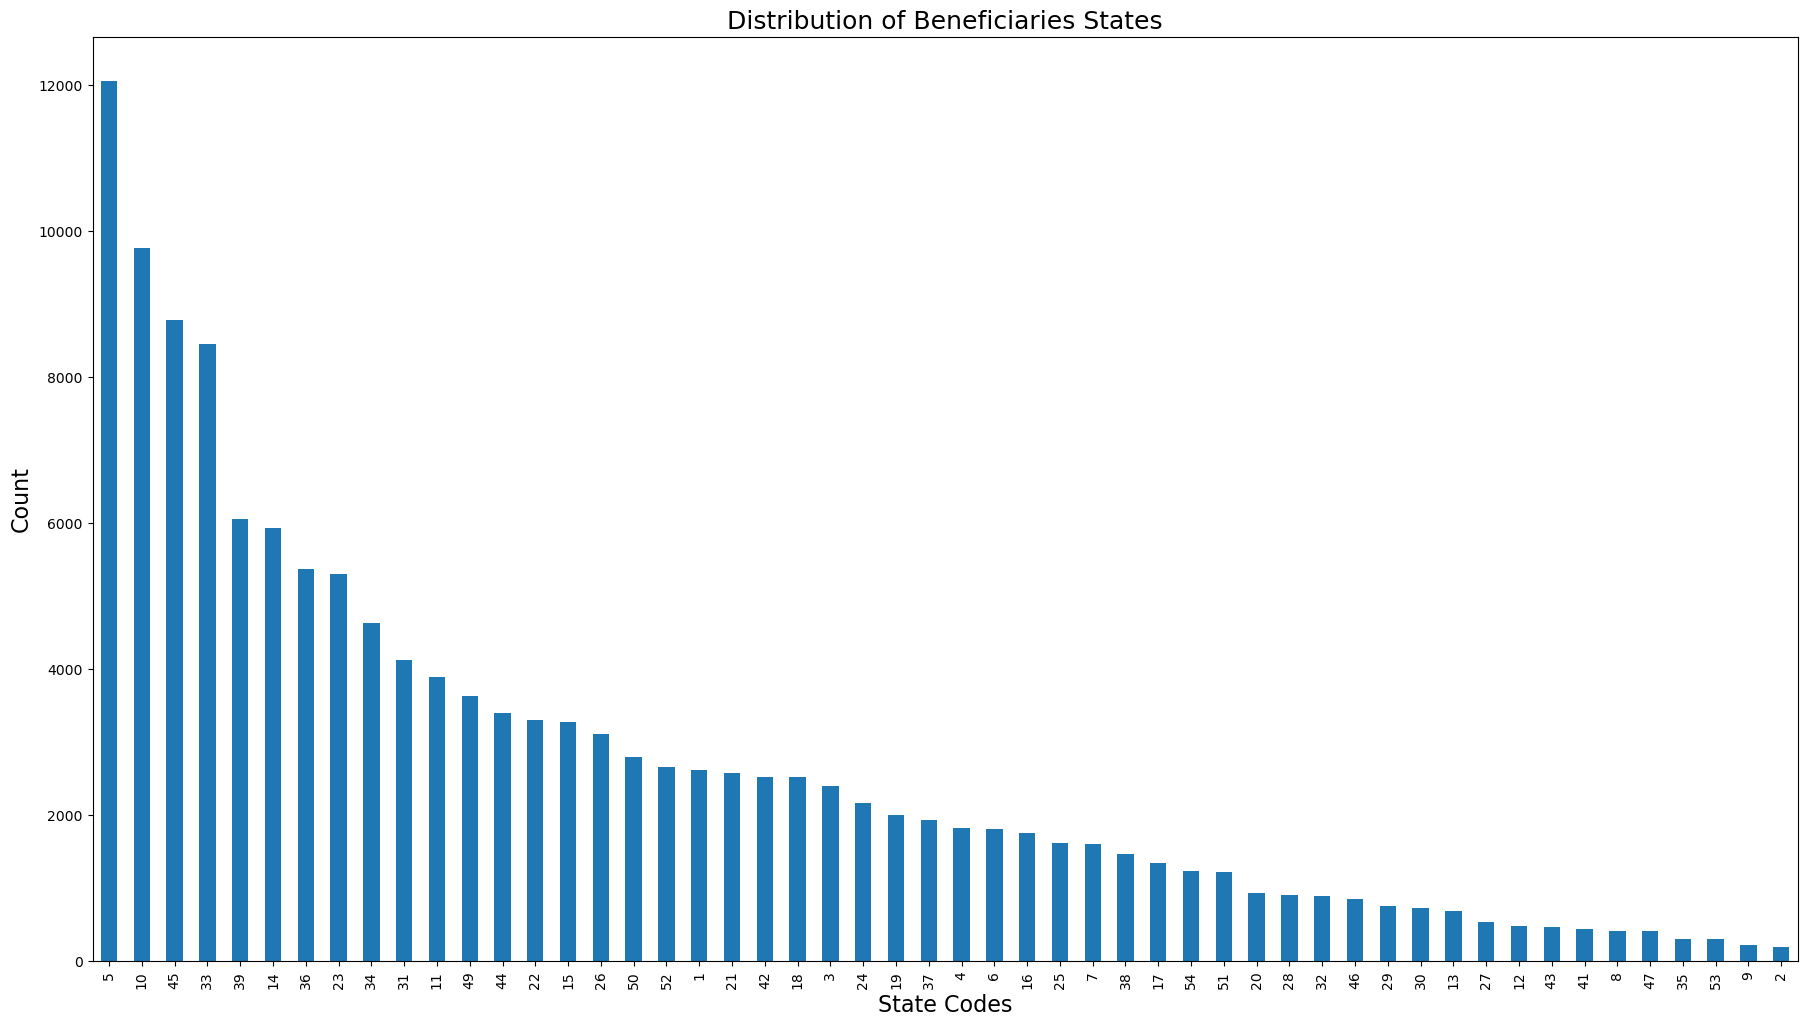

In [21]:
state_counts=train_bene_df['State'].value_counts()

plt.figure(figsize=(22,12))
state_counts.plot(kind='bar')

# Add percentage annotations on top of the bars
# total_count = state_counts.sum()
# for bar, count in zip(bars.patches, state_counts):
#     percentage = count / total_count * 100
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()*1.01, f'{percentage:.2f}%', 
#              ha='center', va='bottom',rotation=90,fontsize=13)

# Add labels and title
plt.ylabel('Count',fontsize=16)
plt.title('Distribution of Beneficiaries States',fontsize=18)
plt.xlabel('State Codes',fontsize=16)
plt.xticks()

# Show plot
plt.show()

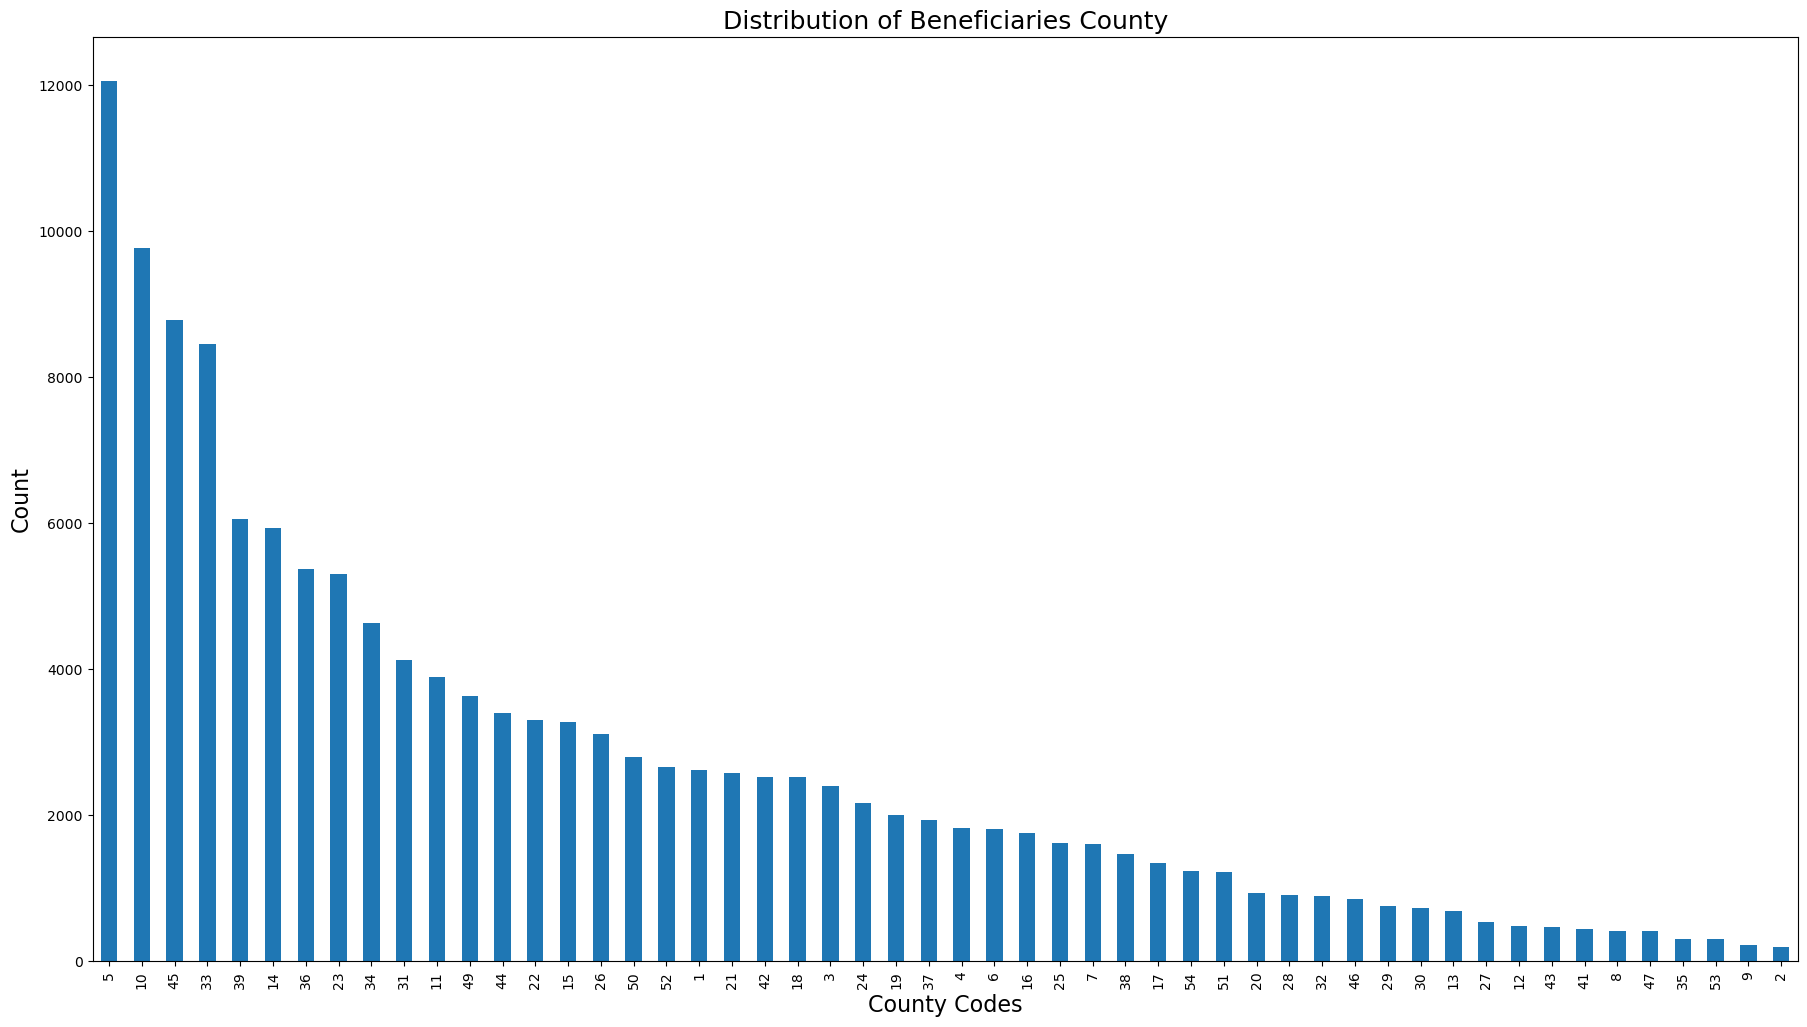

In [22]:
county_counts=train_bene_df['County'].value_counts()

plt.figure(figsize=(22,12))
state_counts.plot(kind='bar')

# Add percentage annotations on top of the bars
# total_count = county_counts.sum()
# for bar, count in zip(bars.patches, county_counts):
#     percentage = count / total_count * 100
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()*1.01, f'{percentage:.2f}%', 
#              ha='center', va='bottom',rotation=90,fontsize=13)

# Add labels and title
plt.ylabel('Count',fontsize=16)
plt.title('Distribution of Beneficiaries County',fontsize=18)
plt.xlabel('County Codes',fontsize=16)
plt.xticks()

# Show plot
plt.show()

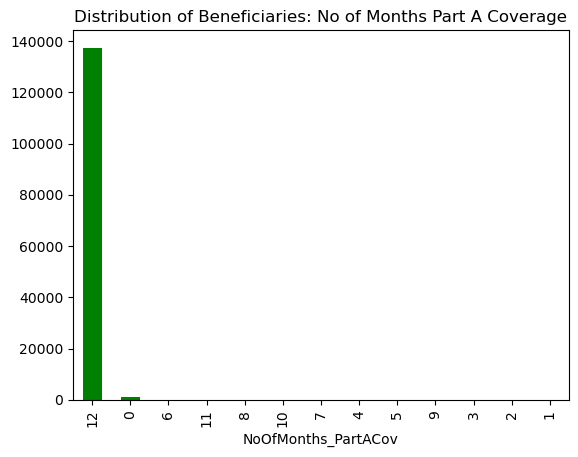

In [23]:
train_bene_df['NoOfMonths_PartACov'].value_counts().plot(kind='bar', color='green')
plt.title('Distribution of Beneficiaries: No of Months Part A Coverage')
plt.show()

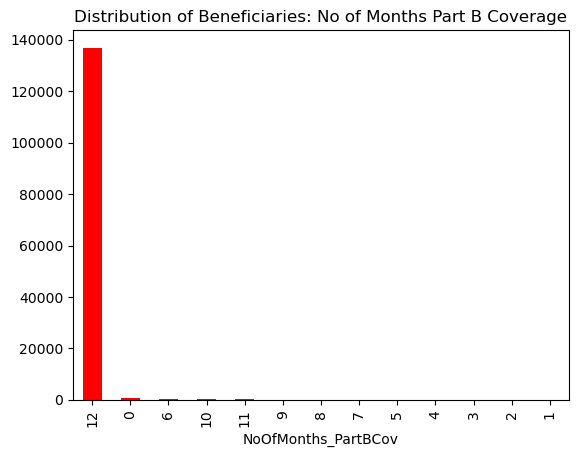

In [24]:
train_bene_df['NoOfMonths_PartBCov'].value_counts().plot(kind='bar', color='red')
plt.title('Distribution of Beneficiaries: No of Months Part B Coverage')
plt.show()

In [25]:
train_bene_df['RenalDiseaseIndicator'].unique()

array(['0', 'Y'], dtype=object)

In [26]:
train_bene_df['RenalDiseaseIndicator'].replace({'0':0, 'Y':1}, inplace=True)
test_bene_df['RenalDiseaseIndicator'].replace({'0':0, 'Y':1}, inplace=True)

In [27]:
train_bene_df['ChronicCond_Alzheimer'].unique()

array([1, 2], dtype=int64)

In [28]:
# Replace

train_bene_df.replace({'ChronicCond_Alzheimer':2, 
                      'ChronicCond_Heartfailure': 2,
                       'ChronicCond_KidneyDisease': 2,
                        'ChronicCond_Cancer': 2,
                       'ChronicCond_ObstrPulmonary': 2,
                       'ChronicCond_Depression': 2, 
                        'ChronicCond_Diabetes': 2,
                       'ChronicCond_IschemicHeart': 2,
                       'ChronicCond_Osteoporasis': 2, 
                        'ChronicCond_rheumatoidarthritis': 2,
                       'ChronicCond_stroke': 2}, 0, inplace=True) 

test_bene_df.replace({'ChronicCond_Alzheimer':2, 
                      'ChronicCond_Heartfailure': 2,
                       'ChronicCond_KidneyDisease': 2,
                        'ChronicCond_Cancer': 2,
                       'ChronicCond_ObstrPulmonary': 2,
                       'ChronicCond_Depression': 2, 
                        'ChronicCond_Diabetes': 2,
                       'ChronicCond_IschemicHeart': 2,
                       'ChronicCond_Osteoporasis': 2, 
                        'ChronicCond_rheumatoidarthritis': 2,
                       'ChronicCond_stroke': 2}, 0, inplace=True) 

In [29]:
train_ip_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
train_ip_df['Admitted?'] = 1

In [31]:
train_ip_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1


In [32]:
train_ip_df[['AdmissionDt', 'DischargeDt']] = train_ip_df[['AdmissionDt', 'DischargeDt']].apply(pd.to_datetime)
test_ip_df[['AdmissionDt', 'DischargeDt']] = test_ip_df[['AdmissionDt', 'DischargeDt']].apply(pd.to_datetime)

In [33]:
train_ip_df[['ClaimStartDt', 'ClaimEndDt']] = train_ip_df[['ClaimStartDt', 'ClaimEndDt']].apply(pd.to_datetime)
test_ip_df[['ClaimStartDt', 'ClaimEndDt']] = test_ip_df[['ClaimStartDt', 'ClaimEndDt']].apply(pd.to_datetime)

In [34]:
# Admit Duration

train_ip_df['AdmitDuration'] = (train_ip_df['DischargeDt'] - train_ip_df['AdmissionDt']).dt.days + 1
test_ip_df['AdmitDuration'] = (test_ip_df['DischargeDt'] - test_ip_df['AdmissionDt']).dt.days + 1

In [35]:
# Claim Duration

train_ip_df['ClaimDuration'] = (train_ip_df['ClaimEndDt'] - train_ip_df['ClaimStartDt']).dt.days + 1
test_ip_df['ClaimDuration'] = (test_ip_df['ClaimEndDt'] - test_ip_df['ClaimStartDt']).dt.days + 1

In [36]:
train_op_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,7041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [37]:
train_ip_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Admitted?', 'AdmitDuration', 'ClaimDuration'],
      dtype='object')

In [38]:
train_op_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [39]:
train_op_df['Admitted?'] = 0

In [40]:
train_op_df[['ClaimStartDt', 'ClaimEndDt']] = train_op_df[['ClaimStartDt', 'ClaimEndDt']].apply(pd.to_datetime)
test_op_df[['ClaimStartDt', 'ClaimEndDt']] = test_op_df[['ClaimStartDt', 'ClaimEndDt']].apply(pd.to_datetime)

In [41]:
# Claim Duration

train_op_df['ClaimDuration'] = (train_op_df['ClaimEndDt'] - train_op_df['ClaimStartDt']).dt.days + 1
test_op_df['ClaimDuration'] = (test_op_df['ClaimEndDt'] - test_op_df['ClaimStartDt']).dt.days + 1

In [42]:
train_all_patients_df = train_op_df.merge(train_ip_df, 
                                                on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
                                                    'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
                                                    'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
                                                    'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
                                                    'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                                                    'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
                                                    'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
                                                    'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
                                                    'ClmAdmitDiagnosisCode','ClaimDuration','Admitted?'], 
                                                how='outer')

test_all_patients_df = test_op_df.merge(test_ip_df, 
                                                on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
                                                    'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
                                                    'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
                                                    'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
                                                    'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                                                    'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
                                                    'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
                                                    'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
                                                    'ClmAdmitDiagnosisCode','ClaimDuration'], 
                                                how='outer')

In [43]:
train_all_patients_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Admitted?,ClaimDuration,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitDuration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,0.0,56409,0,1,NaT,NaT,NaN,NaN
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,0.0,79380,0,1,NaT,NaT,NaN,NaN
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,0.0,NaN,0,1,NaT,NaT,NaN,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,0.0,NaN,0,1,NaT,NaT,NaN,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,0.0,71947,0,1,NaT,NaT,NaN,NaN


train_all_patients_df.shape

### ------------------------------------------------------

In [44]:
train_iop_prv = train_all_patients_df.merge(train_prv, on='Provider')
train_iop_prv.head(10)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Admitted?,ClaimDuration,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitDuration,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,0.0,56409,0,1,NaT,NaT,NaN,NaN,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,0.0,NaN,0,1,NaT,NaT,NaN,NaN,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,0.0,71947,0,1,NaT,NaT,NaN,NaN,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,0.0,NaN,0,1,NaT,NaT,NaN,NaN,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,0.0,NaN,0,1,NaT,NaT,NaN,NaN,Yes
5,BENE11004,CLM252512,2009-03-18,2009-03-18,PRV56011,200,PHY346833,NaN,PHY346833,72290,...,NaN,0.0,NaN,0,1,NaT,NaT,NaN,NaN,Yes
6,BENE11004,CLM322683,2009-04-25,2009-05-15,PRV56011,60,PHY372925,NaN,PHY311407,71856,...,NaN,0.0,NaN,0,21,NaT,NaT,NaN,NaN,Yes
7,BENE11004,CLM339500,2009-05-04,2009-05-16,PRV56011,500,PHY412904,NaN,PHY396473,7237,...,NaN,0.0,NaN,0,13,NaT,NaT,NaN,NaN,Yes
8,BENE11004,CLM564511,2009-09-06,2009-09-06,PRV56011,400,PHY396851,NaN,NaN,9986,...,NaN,0.0,99811,0,1,NaT,NaT,NaN,NaN,Yes
9,BENE11004,CLM720523,2009-12-09,2009-12-09,PRV56011,100,PHY409445,NaN,PHY365422,70700,...,NaN,0.0,NaN,0,1,NaT,NaT,NaN,NaN,Yes


In [45]:
# from pycaret.classification import *
# s = setup(train_iop_prv, target = 'PotentialFraud', session_id = 123)


In [46]:
train_all_pdetails_df = train_all_patients_df.merge(train_bene_df, on=['BeneID'], how='inner') 
test_all_pdetails_df = test_all_patients_df.merge(test_bene_df, on=['BeneID'], how='inner') 

In [47]:
train_all_pdetails_df.shape

(558211, 59)

In [48]:
train_df =  train_all_pdetails_df.merge(train_prv, on='Provider')
test_df = test_all_pdetails_df.merge(test_prv,on='Provider')

In [49]:
train_df.shape

(558211, 60)

In [50]:
test_df.shape

(135392, 58)

In [51]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [52]:
# Missing Values %

train_df.isnull().sum() *100/len(train_df)

BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisCode_7                  88.144805
ClmDiagnosisCode_8                  90.425843
ClmDiagnosisCode_9                  92.509105
ClmDiagnosisCode_10                 99.102490
ClmProcedureCode_1                  95.824160
ClmProcedureCode_2                  99.016501
ClmProcedureCode_3                

In [53]:
train_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Admitted?,ClaimDuration,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitDuration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Dead_or_Alive,Age,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,0,1,NaT,NaT,NaN,NaN,1936-09-01,2009-12-01,2,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,0,73.0,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,1,NaT,NaT,NaN,NaN,1922-07-01,2009-12-01,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,0,87.0,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,0,1,NaT,NaT,NaN,NaN,1922-07-01,2009-12-01,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,0,87.0,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,1,NaT,NaT,NaN,NaN,1922-07-01,2009-12-01,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,0,87.0,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,1,NaT,NaT,NaN,NaN,1922-07-01,2009-12-01,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,0,87.0,Yes


In [54]:
train_df['PotentialFraud'].value_counts()

PotentialFraud
No     345415
Yes    212796
Name: count, dtype: int64

### Distribution of Fraud and Non-Fraud Cases:

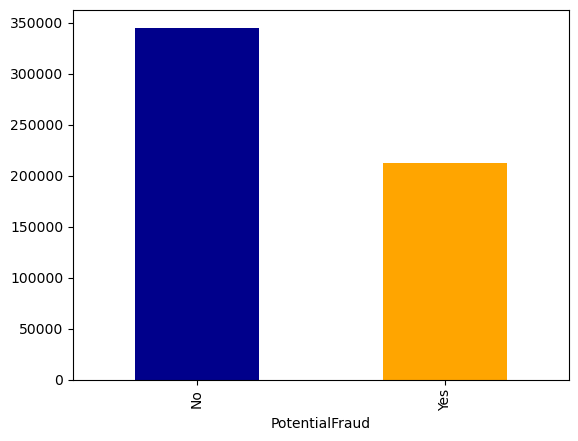

In [55]:
train_df['PotentialFraud'].value_counts().plot(kind='bar',color=['darkblue','orange'])
plt.show()

In [56]:
train_df['Provider'].value_counts()[:10]

Provider
PRV51459    8240
PRV53797    4739
PRV51574    4444
PRV53918    3588
PRV54895    3436
PRV55215    3393
PRV52064    2844
PRV56011    2833
PRV55004    2399
PRV57306    2315
Name: count, dtype: int64

### Top 10 Fraudulent Providers

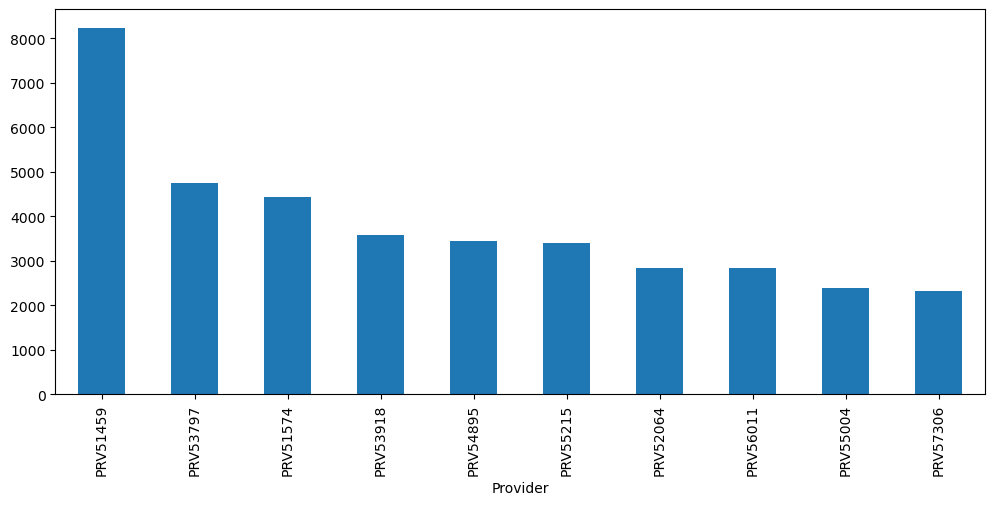

In [57]:
plt.figure(figsize=(12,5))
top10_prv = train_df[train_df['PotentialFraud'] == 'Yes']['Provider'].value_counts()[:10]
top10_prv.plot(kind='bar')
plt.show()

In [58]:
top10_prv.values

array([8240, 4739, 4444, 3588, 3436, 3393, 2844, 2833, 2399, 2315],
      dtype=int64)

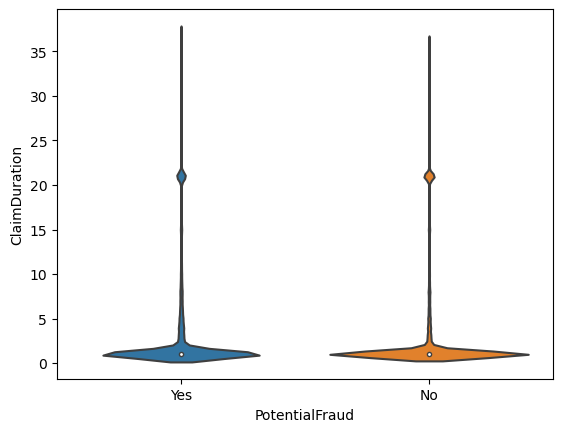

In [59]:
sns.violinplot(data=train_df,x='PotentialFraud',y='ClaimDuration')
plt.show()

In [60]:
train_df['ClaimDuration'].describe()

count    558211.000000
mean          2.727940
std           4.904984
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          37.000000
Name: ClaimDuration, dtype: float64

In [61]:
train_df['AttendingPhysician'].nunique()

82063

In [62]:
tmp = pd.DataFrame(train_df.groupby(['Provider','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['Provider', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

,Provider,Fraud?,Num_of_cases,Cases,Percentage
0,PRV51001,No,25,345415,0.01
1,PRV51003,Yes,132,212796,0.06
2,PRV51004,No,149,345415,0.04
3,PRV51005,Yes,1165,212796,0.55
4,PRV51007,No,72,345415,0.02


### Top 10 Fraudulent Attending Physicians

In [63]:
colors = sns.color_palette("dark", 10)

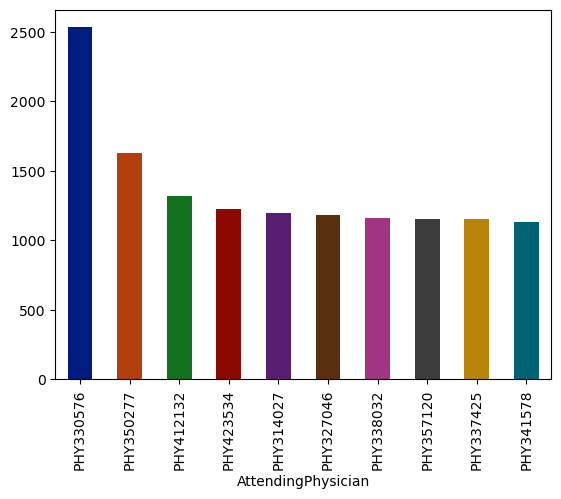

In [64]:
top10_aphy = train_df[train_df['PotentialFraud'] == 'Yes']['AttendingPhysician'].value_counts()[:10]
top10_aphy.plot(kind='bar',color=colors)
plt.show()

In [65]:
# train_attphy_fraud=train_df.groupby(['AttendingPhysician','PotentialFraud'])['BeneID'].count().reset_index()
# train_attphy_fraud[train_attphy_fraud['AttendingPhysician']=='PHY350277']

### Top 10 Fraudulent Operating Physicians

In [66]:
colors = sns.color_palette("husl", 10)

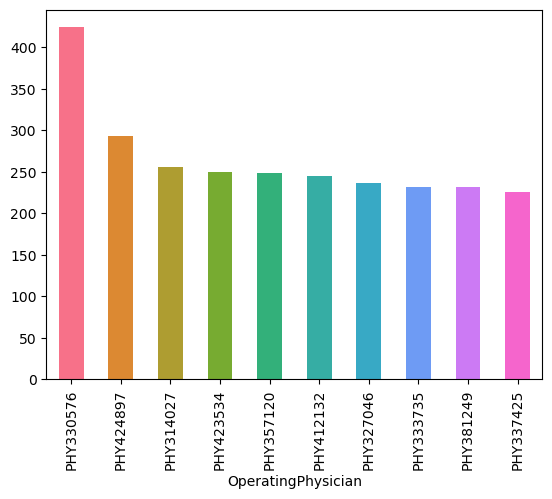

In [67]:
top10_ophy = train_df[train_df['PotentialFraud'] == 'Yes']['OperatingPhysician'].value_counts()[:10]
top10_ophy.plot(kind='bar', color = colors)
plt.show()

### Top 10 Fraudulent Other Physicians

In [68]:
colors = sns.color_palette("tab10", 10)

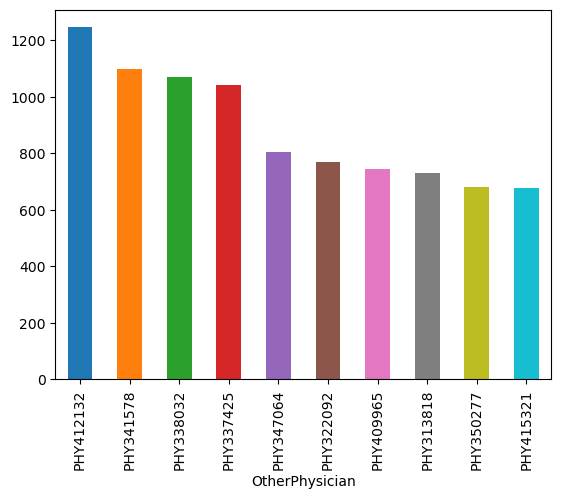

In [69]:
top10_otherphy = train_df[train_df['PotentialFraud'] == 'Yes']['OtherPhysician'].value_counts()[:10]
top10_otherphy.plot(kind='bar',color=colors)
plt.show()

### ClmAdmitDiagnosisCode vs PotentialFraud

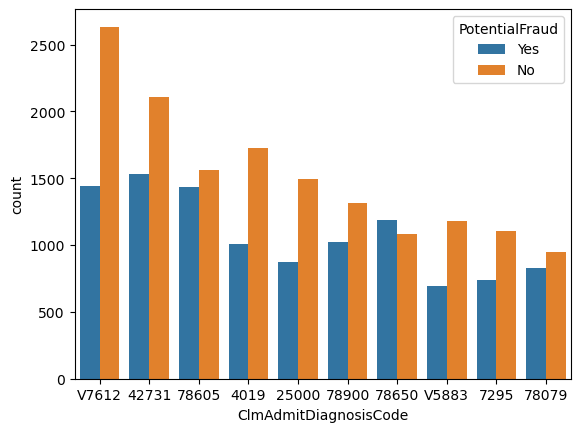

In [70]:
sns.countplot(train_df,x='ClmAdmitDiagnosisCode',hue='PotentialFraud',order=train_df['ClmAdmitDiagnosisCode'].value_counts()[:10].index)
plt.show()

In [71]:
colors = sns.color_palette("Paired", 10)

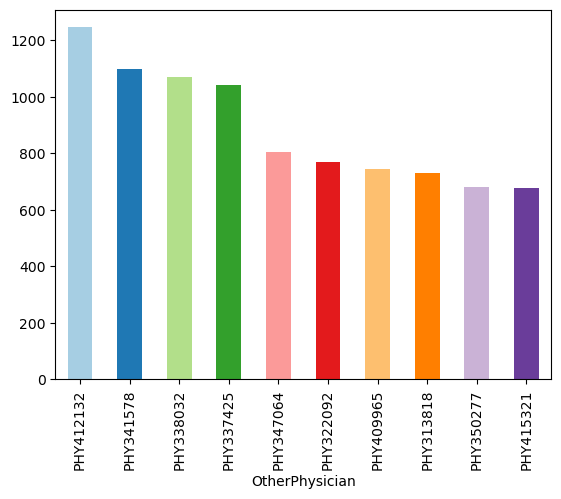

In [72]:
top10_dgcode = train_df[train_df['PotentialFraud'] == 'Yes']['ClmAdmitDiagnosisCode'].value_counts()[:10]
top10_otherphy.plot(kind='bar',color=colors)
plt.show()

### DiagnosisGroupCode vs Potential Fraud

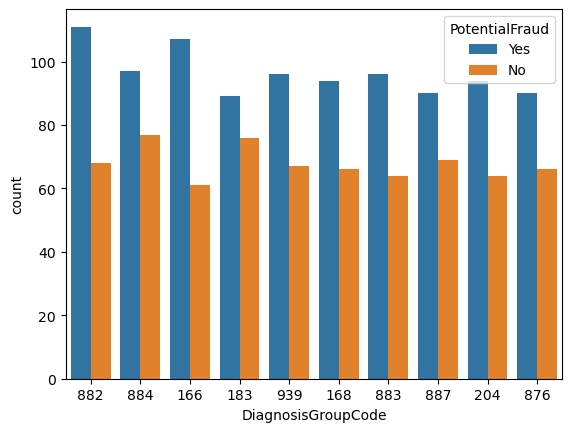

In [73]:
sns.countplot(train_df,x='DiagnosisGroupCode',hue='PotentialFraud',order=train_df['DiagnosisGroupCode'].value_counts()[:10].index)
plt.show()

In [74]:
colors = sns.color_palette("tab20b", 10)

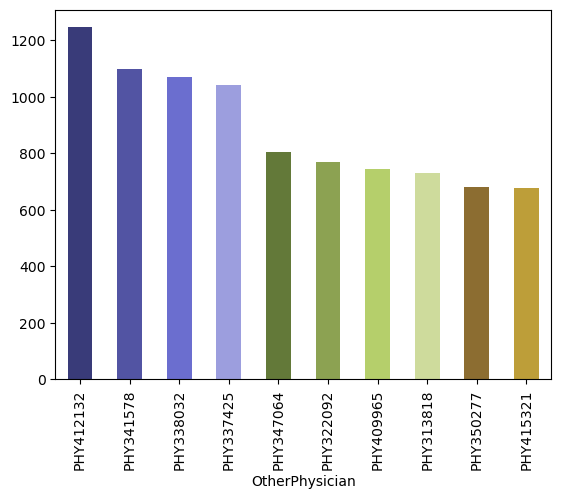

In [75]:
top10_dggroup = train_df[train_df['PotentialFraud'] == 'Yes']['DiagnosisGroupCode'].value_counts()[:10]
top10_otherphy.plot(kind='bar',color=colors)
plt.show()

### Distribution of Fraudulent Cases in Races

In [76]:
colors = sns.color_palette("husl", 10)

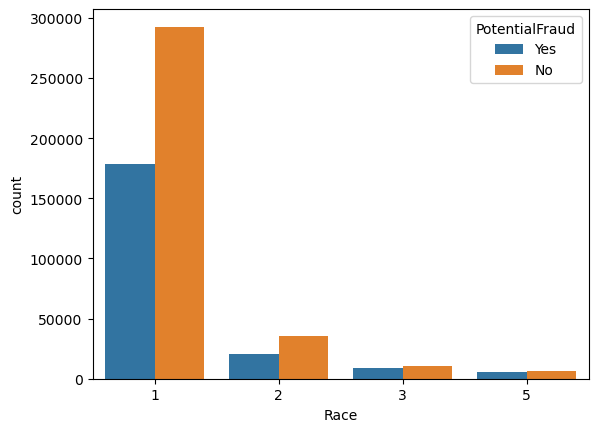

In [77]:
sns.countplot(train_df,x='Race',hue='PotentialFraud')
plt.show()

### IPAnnualDeductibleAmt Vs IPAnnualReimbursementAmt 

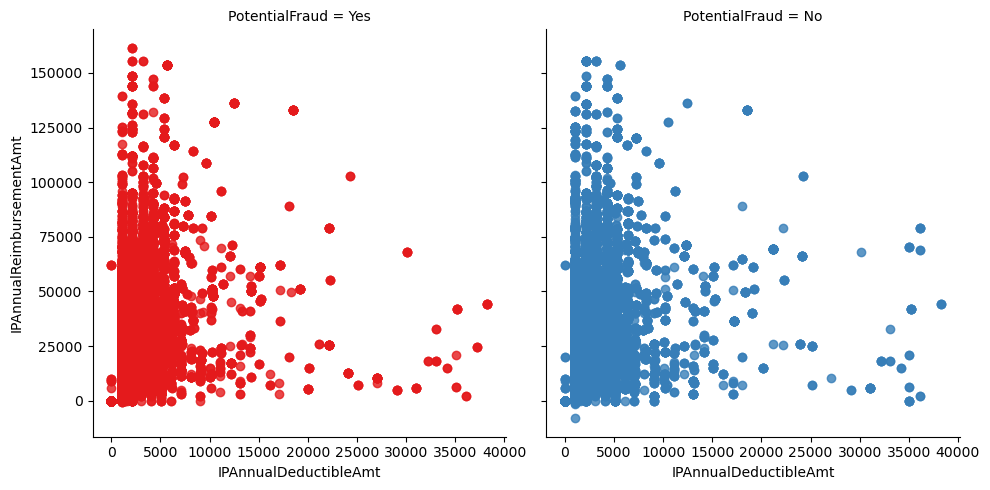

In [78]:
sns.lmplot(train_df,x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',palette='Set1', col='PotentialFraud',fit_reg=False,)
plt.show()

### DeductibleAmtPaid Vs InsClaimAmtReimbursed

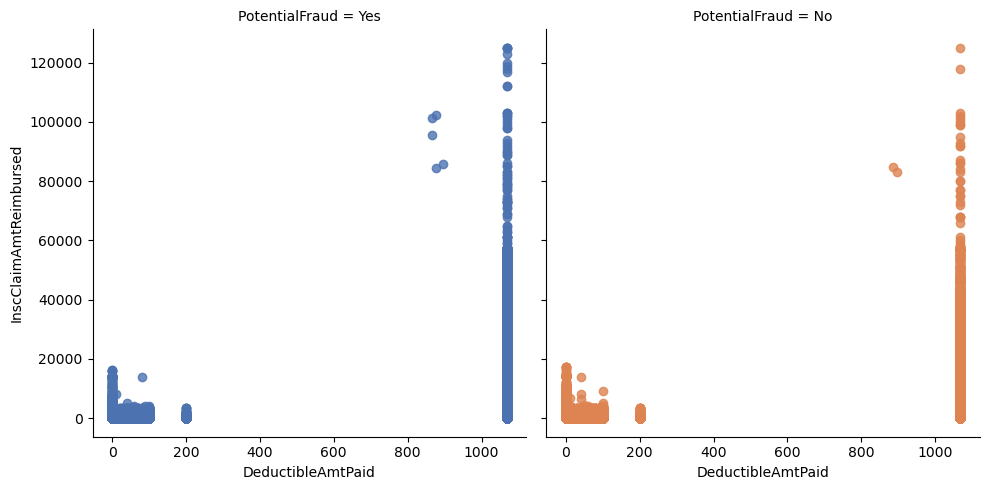

In [79]:
sns.lmplot(train_df,x='DeductibleAmtPaid',y='InscClaimAmtReimbursed',hue='PotentialFraud',palette='deep',
           col='PotentialFraud',fit_reg=False)
plt.show()

### Grouped by Provider

In [80]:
train_df["PerProviderAvg_InscClaimAmtReimbursed"]=train_df.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
train_df["PerProviderAvg_DeductibleAmtPaid"]=train_df.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
train_df["PerProviderAvg_IPAnnualReimbursementAmt"]=train_df.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
train_df["PerProviderAvg_IPAnnualDeductibleAmt"]=train_df.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
train_df["PerProviderAvg_OPAnnualReimbursementAmt"]=train_df.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
train_df["PerProviderAvg_OPAnnualDeductibleAmt"]=train_df.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')


test_df["PerProviderAvg_InscClaimAmtReimbursed"]=test_df.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
test_df["PerProviderAvg_DeductibleAmtPaid"]=test_df.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
test_df["PerProviderAvg_IPAnnualReimbursementAmt"]=test_df.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
test_df["PerProviderAvg_IPAnnualDeductibleAmt"]=test_df.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
test_df["PerProviderAvg_OPAnnualReimbursementAmt"]=test_df.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
test_df["PerProviderAvg_OPAnnualDeductibleAmt"]=test_df.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')

### Grouped by Beneficiary

In [81]:
train_df["PerBeneIDAvg_InscClaimAmtReimbursed"]=train_df.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
train_df["PerBeneIDAvg_DeductibleAmtPaid"]=train_df.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
train_df["PerBeneIDAvg_IPAnnualReimbursementAmt"]=train_df.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
train_df["PerBeneIDAvg_IPAnnualDeductibleAmt"]=train_df.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
train_df["PerBeneIDAvg_OPAnnualReimbursementAmt"]=train_df.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
train_df["PerBeneIDAvg_OPAnnualDeductibleAmt"]=train_df.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')


test_df["PerBeneIDAvg_InscClaimAmtReimbursed"]=test_df.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
test_df["PerBeneIDAvg_DeductibleAmtPaid"]=test_df.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
test_df["PerBeneIDAvg_IPAnnualReimbursementAmt"]=test_df.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
test_df["PerBeneIDAvg_IPAnnualDeductibleAmt"]=test_df.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
test_df["PerBeneIDAvg_OPAnnualReimbursementAmt"]=test_df.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
test_df["PerBeneIDAvg_OPAnnualDeductibleAmt"]=test_df.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')

### Grouped by Other Physicians

In [82]:
train_df["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=train_df.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
train_df["PerOtherPhysicianAvg_DeductibleAmtPaid"]=train_df.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
train_df["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=train_df.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
train_df["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=train_df.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
train_df["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=train_df.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
train_df["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=train_df.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
train_df["PerOtherPhysicianAvg_AdmitForDays"]=train_df.groupby('OtherPhysician')['AdmitDuration'].transform('mean')

test_df["PerOtherPhysicianAvg_InscClaimAmtReimbursed"]=test_df.groupby('OtherPhysician')['InscClaimAmtReimbursed'].transform('mean')
test_df["PerOtherPhysicianAvg_DeductibleAmtPaid"]=test_df.groupby('OtherPhysician')['DeductibleAmtPaid'].transform('mean')
test_df["PerOtherPhysicianAvg_IPAnnualReimbursementAmt"]=test_df.groupby('OtherPhysician')['IPAnnualReimbursementAmt'].transform('mean')
test_df["PerOtherPhysicianAvg_IPAnnualDeductibleAmt"]=test_df.groupby('OtherPhysician')['IPAnnualDeductibleAmt'].transform('mean')
test_df["PerOtherPhysicianAvg_OPAnnualReimbursementAmt"]=test_df.groupby('OtherPhysician')['OPAnnualReimbursementAmt'].transform('mean')
test_df["PerOtherPhysicianAvg_OPAnnualDeductibleAmt"]=test_df.groupby('OtherPhysician')['OPAnnualDeductibleAmt'].transform('mean')
test_df["PerOtherPhysicianAvg_AdmitForDays"]=test_df.groupby('OtherPhysician')['AdmitDuration'].transform('mean')

### Grouped by Attending Physicians

In [83]:
train_df["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=train_df.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
train_df["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=train_df.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
train_df["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=train_df.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
train_df["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=train_df.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
train_df["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=train_df.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
train_df["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=train_df.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
train_df["PerAttendingPhysicianAvg_AdmitForDays"]=train_df.groupby('AttendingPhysician')['AdmitDuration'].transform('mean')

test_df["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=test_df.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
test_df["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=test_df.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
test_df["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=test_df.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
test_df["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=test_df.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
test_df["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=test_df.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
test_df["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=test_df.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
test_df["PerAttendingPhysicianAvg_AdmitForDays"]=test_df.groupby('AttendingPhysician')['AdmitDuration'].transform('mean')

### Grouped by Operating Physicians

In [84]:
train_df["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=train_df.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
train_df["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=train_df.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
train_df["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=train_df.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
train_df["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=train_df.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
train_df["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=train_df.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
train_df["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=train_df.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
train_df["PerOperatingPhysicianAvg_AdmitForDays"]=train_df.groupby('OperatingPhysician')['AdmitDuration'].transform('mean')

test_df["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=test_df.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
test_df["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=test_df.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
test_df["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=test_df.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
test_df["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=test_df.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
test_df["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=test_df.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
test_df["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=test_df.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
test_df["PerOperatingPhysicianAvg_AdmitForDays"]=test_df.groupby('OperatingPhysician')['AdmitDuration'].transform('mean')

### Grouped by ClmAdmitDiagnosisCode

In [85]:
train_df["PerDiagnosisCodeAvg_InscClaimAmtReimbursed"]=train_df.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
train_df["PerDiagnosisCodeAvg_DeductibleAmtPaid"]=train_df.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
train_df["PerDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=train_df.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
train_df["PerDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=train_df.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
train_df["PerDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=train_df.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
train_df["PerDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=train_df.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
train_df["PerDiagnosisCodeAvg_AdmitForDays"]=train_df.groupby('ClmAdmitDiagnosisCode')['AdmitDuration'].transform('mean')

test_df["PerDiagnosisCodeAvg_InscClaimAmtReimbursed"]=test_df.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
test_df["PerDiagnosisCodeAvg_DeductibleAmtPaid"]=test_df.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
test_df["PerDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=test_df.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
test_df["PerDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=test_df.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
test_df["PerDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=test_df.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
test_df["PerDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=test_df.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
test_df["PerDiagnosisCodeAvg_AdmitForDays"]=test_df.groupby('ClmAdmitDiagnosisCode')['AdmitDuration'].transform('mean')

In [86]:
train_df["ClmCount_Provider"]=train_df.groupby(['Provider'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_BeneID"]=train_df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_AttendingPhysician"]=train_df.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_OtherPhysician"]=train_df.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_OperatingPhysician"]=train_df.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmAdmitDiagnosisCode"]=train_df.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmProcedureCode_1"]=train_df.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmProcedureCode_2"]=train_df.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmProcedureCode_3"]=train_df.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmProcedureCode_4"]=train_df.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmProcedureCode_5"]=train_df.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_1"]=train_df.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_2"]=train_df.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_3"]=train_df.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_4"]=train_df.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_5"]=train_df.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_6"]=train_df.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_7"]=train_df.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_8"]=train_df.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_ClmDiagnosisCode_9"]=train_df.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_DiagnosisGroupCode"]=train_df.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_BeneID_AttendingPhysician"]=train_df.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_BeneID_OtherPhysician"]=train_df.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=train_df.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=train_df.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_BeneID_OperatingPhysician"]=train_df.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=train_df.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=train_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
train_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=train_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')


test_df["ClmCount_Provider"]=test_df.groupby(['Provider'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_BeneID"]=test_df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_AttendingPhysician"]=test_df.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_OtherPhysician"]=test_df.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_OperatingPhysician"]=test_df.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_ClmAdmitDiagnosisCode"]=test_df.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_ClmProcedureCode_1"]=test_df.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_ClmProcedureCode_2"]=test_df.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_ClmProcedureCode_3"]=test_df.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_ClmProcedureCode_4"]=test_df.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_ClmProcedureCode_5"]=test_df.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_ClmDiagnosisCode_1"]=test_df.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_ClmDiagnosisCode_2"]=test_df.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_ClmDiagnosisCode_3"]=test_df.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_ClmDiagnosisCode_4"]=test_df.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_ClmDiagnosisCode_5"]=test_df.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_ClmDiagnosisCode_6"]=test_df.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_ClmDiagnosisCode_7"]=test_df.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_ClmDiagnosisCode_8"]=test_df.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_ClmDiagnosisCode_9"]=test_df.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_DiagnosisGroupCode"]=test_df.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_BeneID_AttendingPhysician"]=test_df.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_BeneID_OtherPhysician"]=test_df.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=test_df.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_BeneID_OperatingPhysician"]=test_df.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=test_df.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=test_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
test_df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=test_df.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')

In [87]:
train_df.shape

(558211, 129)

In [88]:
columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                      'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt', 'DiagnosisGroupCode',
                      'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
                      'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                      'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'DOB', 'DOD', 'State', 'County']

train_df.drop(columns=columns, axis=1, inplace=True)

In [89]:
train_df.shape

(558211, 101)

In [90]:
train_df['PotentialFraud'] = train_df['PotentialFraud'].map({'Yes':1,'No':0})

In [91]:
train_df = pd.get_dummies(train_df,columns=['Gender', 'Race'], drop_first=True)

In [92]:
train_df.head()

,Provider,InscClaimAmtReimbursed,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,Admitted?,ClaimDuration,AdmitDuration,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Dead_or_Alive,Age,PotentialFraud,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerOtherPhysicianAvg_InscClaimAmtReimbursed,PerOtherPhysicianAvg_DeductibleAmtPaid,PerOtherPhysicianAvg_IPAnnualReimbursementAmt,PerOtherPhysicianAvg_IPAnnualDeductibleAmt,PerOtherPhysicianAvg_OPAnnualReimbursementAmt,PerOtherPhysicianAvg_OPAnnualDeductibleAmt,PerOtherPhysicianAvg_AdmitForDays,PerAttendingPhysicianAvg_InscClaimAmtReimbursed,PerAttendingPhysicianAvg_DeductibleAmtPaid,PerAttendingPhysicianAvg_IPAnnualReimbursementAmt,PerAttendingPhysicianAvg_IPAnnualDeductibleAmt,PerAttendingPhysicianAvg_OPAnnualReimbursementAmt,PerAttendingPhysicianAvg_OPAnnualDeductibleAmt,PerAttendingPhysicianAvg_AdmitForDays,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_AdmitForDays,PerDiagnosisCodeAvg_InscClaimAmtReimbursed,PerDiagnosisCodeAvg_DeductibleAmtPaid,PerDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerDiagnosisCodeAvg_AdmitForDays,ClmCount_Provider,ClmCount_Provider_BeneID,ClmCount_Provider_AttendingPhysician,ClmCount_Provider_OtherPhysician,ClmCount_Provider_OperatingPhysician,ClmCount_Provider_ClmAdmitDiagnosisCode,ClmCount_Provider_ClmProcedureCode_1,ClmCount_Provider_ClmProcedureCode_2,ClmCount_Provider_ClmProcedureCode_3,ClmCount_Provider_ClmProcedureCode_4,ClmCount_Provider_ClmProcedureCode_5,ClmCount_Provider_ClmDiagnosisCode_1,ClmCount_Provider_ClmDiagnosisCode_2,ClmCount_Provider_ClmDiagnosisCode_3,ClmCount_Provider_ClmDiagnosisCode_4,ClmCount_Provider_ClmDiagnosisCode_5,ClmCount_Provider_ClmDiagnosisCode_6,ClmCount_Provider_ClmDiagnosisCode_7,ClmCount_Provider_ClmDiagnosisCode_8,ClmCount_Provider_ClmDiagnosisCode_9,ClmCount_Provider_DiagnosisGroupCode,ClmCount_Provider_BeneID_AttendingPhysician,ClmCount_Provider_BeneID_OtherPhysician,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
0,PRV56011,30,NaN,NaN,NaN,0.0,0,1,NaN,0,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,0,73.0,1,261.786092,2.85916,4717.303212,470.136251,2094.740558,583.660431,30.000000,0.0,0.0,0.0,30.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.416667,2.638889,5028.888889,400.500000,1915.000000,520.277778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1780.000000,246.363636,5018.636364,631.090909,1498.181818,360.000000,4.0,2833,1,72.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,True,False,False,False
1,PRV56011,40,NaN,NaN,NaN,0.0,0

In [93]:
train_df.isnull().sum()*100/len(train_df)

Provider                                                            0.000000
InscClaimAmtReimbursed                                              0.000000
ClmProcedureCode_4                                                 99.978861
ClmProcedureCode_5                                                 99.998388
ClmProcedureCode_6                                                100.000000
DeductibleAmtPaid                                                   0.161050
Admitted?                                                           0.000000
ClaimDuration                                                       0.000000
AdmitDuration                                                      92.749337
RenalDiseaseIndicator                                               0.000000
NoOfMonths_PartACov                                                 0.000000
NoOfMonths_PartBCov                                                 0.000000
ChronicCond_Alzheimer                                               0.000000

In [94]:
train_df.fillna(0, inplace=True)

In [95]:
train_df.isnull().sum()*100/len(train_df)

Provider                                                          0.0
InscClaimAmtReimbursed                                            0.0
ClmProcedureCode_4                                                0.0
ClmProcedureCode_5                                                0.0
ClmProcedureCode_6                                                0.0
DeductibleAmtPaid                                                 0.0
Admitted?                                                         0.0
ClaimDuration                                                     0.0
AdmitDuration                                                     0.0
RenalDiseaseIndicator                                             0.0
NoOfMonths_PartACov                                               0.0
NoOfMonths_PartBCov                                               0.0
ChronicCond_Alzheimer                                             0.0
ChronicCond_Heartfailure                                          0.0
ChronicCond_KidneyDi

In [96]:
train_df.shape

(558211, 103)

In [97]:
train_df.head()

,Provider,InscClaimAmtReimbursed,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,Admitted?,ClaimDuration,AdmitDuration,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Dead_or_Alive,Age,PotentialFraud,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerOtherPhysicianAvg_InscClaimAmtReimbursed,PerOtherPhysicianAvg_DeductibleAmtPaid,PerOtherPhysicianAvg_IPAnnualReimbursementAmt,PerOtherPhysicianAvg_IPAnnualDeductibleAmt,PerOtherPhysicianAvg_OPAnnualReimbursementAmt,PerOtherPhysicianAvg_OPAnnualDeductibleAmt,PerOtherPhysicianAvg_AdmitForDays,PerAttendingPhysicianAvg_InscClaimAmtReimbursed,PerAttendingPhysicianAvg_DeductibleAmtPaid,PerAttendingPhysicianAvg_IPAnnualReimbursementAmt,PerAttendingPhysicianAvg_IPAnnualDeductibleAmt,PerAttendingPhysicianAvg_OPAnnualReimbursementAmt,PerAttendingPhysicianAvg_OPAnnualDeductibleAmt,PerAttendingPhysicianAvg_AdmitForDays,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_AdmitForDays,PerDiagnosisCodeAvg_InscClaimAmtReimbursed,PerDiagnosisCodeAvg_DeductibleAmtPaid,PerDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerDiagnosisCodeAvg_AdmitForDays,ClmCount_Provider,ClmCount_Provider_BeneID,ClmCount_Provider_AttendingPhysician,ClmCount_Provider_OtherPhysician,ClmCount_Provider_OperatingPhysician,ClmCount_Provider_ClmAdmitDiagnosisCode,ClmCount_Provider_ClmProcedureCode_1,ClmCount_Provider_ClmProcedureCode_2,ClmCount_Provider_ClmProcedureCode_3,ClmCount_Provider_ClmProcedureCode_4,ClmCount_Provider_ClmProcedureCode_5,ClmCount_Provider_ClmDiagnosisCode_1,ClmCount_Provider_ClmDiagnosisCode_2,ClmCount_Provider_ClmDiagnosisCode_3,ClmCount_Provider_ClmDiagnosisCode_4,ClmCount_Provider_ClmDiagnosisCode_5,ClmCount_Provider_ClmDiagnosisCode_6,ClmCount_Provider_ClmDiagnosisCode_7,ClmCount_Provider_ClmDiagnosisCode_8,ClmCount_Provider_ClmDiagnosisCode_9,ClmCount_Provider_DiagnosisGroupCode,ClmCount_Provider_BeneID_AttendingPhysician,ClmCount_Provider_BeneID_OtherPhysician,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
0,PRV56011,30,0.0,0.0,0.0,0.0,0,1,0.0,0,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,0,73.0,1,261.786092,2.85916,4717.303212,470.136251,2094.740558,583.660431,30.000000,0.0,0.0,0.0,30.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195.416667,2.638889,5028.888889,400.500000,1915.000000,520.277778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1780.000000,246.363636,5018.636364,631.090909,1498.181818,360.000000,4.0,2833,1,72.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,True,False,False,False
1,PRV56011,40,0.0,0.0,0.0,0.0,0

In [98]:
train_df = train_df.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')

In [99]:
train_df.head(15)

,Provider,PotentialFraud,InscClaimAmtReimbursed,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,Admitted?,ClaimDuration,AdmitDuration,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Dead_or_Alive,Age,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerOtherPhysicianAvg_InscClaimAmtReimbursed,PerOtherPhysicianAvg_DeductibleAmtPaid,PerOtherPhysicianAvg_IPAnnualReimbursementAmt,PerOtherPhysicianAvg_IPAnnualDeductibleAmt,PerOtherPhysicianAvg_OPAnnualReimbursementAmt,PerOtherPhysicianAvg_OPAnnualDeductibleAmt,PerOtherPhysicianAvg_AdmitForDays,PerAttendingPhysicianAvg_InscClaimAmtReimbursed,PerAttendingPhysicianAvg_DeductibleAmtPaid,PerAttendingPhysicianAvg_IPAnnualReimbursementAmt,PerAttendingPhysicianAvg_IPAnnualDeductibleAmt,PerAttendingPhysicianAvg_OPAnnualReimbursementAmt,PerAttendingPhysicianAvg_OPAnnualDeductibleAmt,PerAttendingPhysicianAvg_AdmitForDays,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_AdmitForDays,PerDiagnosisCodeAvg_InscClaimAmtReimbursed,PerDiagnosisCodeAvg_DeductibleAmtPaid,PerDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerDiagnosisCodeAvg_AdmitForDays,ClmCount_Provider,ClmCount_Provider_BeneID,ClmCount_Provider_AttendingPhysician,ClmCount_Provider_OtherPhysician,ClmCount_Provider_OperatingPhysician,ClmCount_Provider_ClmAdmitDiagnosisCode,ClmCount_Provider_ClmProcedureCode_1,ClmCount_Provider_ClmProcedureCode_2,ClmCount_Provider_ClmProcedureCode_3,ClmCount_Provider_ClmProcedureCode_4,ClmCount_Provider_ClmProcedureCode_5,ClmCount_Provider_ClmDiagnosisCode_1,ClmCount_Provider_ClmDiagnosisCode_2,ClmCount_Provider_ClmDiagnosisCode_3,ClmCount_Provider_ClmDiagnosisCode_4,ClmCount_Provider_ClmDiagnosisCode_5,ClmCount_Provider_ClmDiagnosisCode_6,ClmCount_Provider_ClmDiagnosisCode_7,ClmCount_Provider_ClmDiagnosisCode_8,ClmCount_Provider_ClmDiagnosisCode_9,ClmCount_Provider_DiagnosisGroupCode,ClmCount_Provider_BeneID_AttendingPhysician,ClmCount_Provider_BeneID_OtherPhysician,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
0,PRV51001,0,104640,0.0,0.0,0.0,5340.0,5,61,30.0,8,300,300,15,19,17,5,10,9,21,23,6,8,6,440150,22428,65380,11598,0,1971.0,104640.0,5340.0,440150.0,22428.0,65380.0,11598.0,82115.543651,4611.929906,440150.0,22428.0,65380.0,11598.0,44580.000000,1068.000000,1.741200e+05,8544.000000,32850.000000,4218.000000,15.0,104022.857143,5366.666667,4.491643e+05,23648.571429,6.316762e+04,11973.238095,30.000000,47136.666667,2136.000000,276640.000000,10324.0,9560.000000,3266.666667,16.0,58069.039706,6245.455089,2.250336e+05,16276.251430,23602.973745,6424.266241,69.37

In [100]:
train_df.shape

(5410, 103)

In [ ]:
from pycaret.classification import *
s = setup(train_df, target = 'PotentialFraud', ignore_features='Provider',normalize=True,normalize_method='robust', fix_imbalance = True)

In [ ]:
best_model = compare_models(sort='AUC')

In [ ]:
# print best_model parameters**
print(best_model.get_params())

# except for catboost you can do this:**
print(best_model)

In [ ]:
plot_model(best_model, plot = 'auc', save=True)

In [ ]:
rf = create_model('rf')

In [ ]:
# Feature Importance on basis of RF

plot_model(rf, plot = 'feature',save=True)

In [ ]:
plot_model(best_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True},save=True)

### Anomaly Detection:

In [ ]:
from pycaret.anomaly import *
s = setup(train_df, ignore_features='Provider',normalize=True,normalize_method='robust')

In [ ]:
iforest = create_model('iforest')
iforest

In [ ]:
models()

In [ ]:
s.plot_model(iforest, plot = 'tsne')

In [ ]:
result = assign_model(iforest)
result.head()

In [ ]:
train_df.drop('Provider',axis=1,inplace=True)

In [ ]:
predictions = predict_model(iforest, data = train_df)
predictions.head()

### ----------------------------

In [ ]:
# from sklearn.model_selection import train_test_split as tts

# X = train_df.drop(axis=1, columns=['Provider','PotentialFraud'])
# y = train_df['PotentialFraud']

# X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, stratify=y, random_state=39)

In [ ]:
# from sklearn.preprocessing import RobustScaler

# robust_scaler = RobustScaler()
# robust_scaler.fit(X_train)
# X_train_std = robust_scaler.transform(X_train)
# X_test_std = robust_scaler.transform(X_test)

In [ ]:
# from sklearn.linear_model import LogisticRegressionCV
# from sklearn import metrics
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# log_reg_1 = LogisticRegression(C=0.0316228, penalty='l1',
#                                fit_intercept=True, solver='liblinear', tol=0.0001, max_iter=500, 
#                                class_weight='balanced',
#                                verbose=0, 
#                                intercept_scaling=1.0,
#                                multi_class='auto',
#                                random_state=49)

# log_reg_1.fit(X_train_std, y_train)

In [ ]:
# def pred_prob(clf, data): 
#     """
#     Description :: This function is created for storing the predicted probabability using the trained model.
    
#     Input :: It accepts below input parameters :
#       - clf : Trained model classifier
#       - data : Dataset for which we want to generate the predictions
#     """
#     y_pred = clf.predict_proba(data)[:,1]
#     return y_pred

# def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
#     """
#     Description :: This function is created for calculating the AUC score on train and test data. And, plotting the ROC curve.
    
#     Input :: It accepts below input parameters :
#       - train_fpr : Train False +ve rate
#       - train_tpr : Train True +ve rate
#       - test_fpr : Test False +ve rate
#       - test_tpr : Test True +ve rate
#     """
# # calculate auc for train and test
#     train_auc = auc(train_fpr, train_tpr)
#     test_auc = auc(test_fpr, test_tpr)
#     with plt.style.context('seaborn-poster'):
#       plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
#       plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
#       plt.legend()
#       plt.xlabel("False Positive Rate(FPR)")
#       plt.ylabel("True Positive Rate(TPR)")
#       plt.title("Area Under Curve")
# #       plt.grid(which='major', color='lightgrey', linestyle='--')
#       plt.minorticks_on()
#       plt.show()
    
# def find_best_threshold(threshold, fpr, tpr):
#     """
#     Description :: This function is created for finding the best threshold value.
#     """
#     t = threshold[np.argmax(tpr * (1-fpr))]
#     return t

# def predict_with_best_t(proba, threshold):
#     """
#     Description :: This function is created for generating the predictions based on the best threshold value.
#     """

#     predictions = []
    
#     for i in proba:
#         if i>=threshold:
#             predictions.append(1)
#         else:
#             predictions.append(0)
#     return predictions

# def draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred):
#     """
#     Description :: This function is created for plotting the confusion matrix of TRAIN and TEST sets.
#     """
#     fig, ax = plt.subplots(1,2, figsize=(20,6))

#     train_prediction = predict_with_best_t(y_train_pred, best_t)
#     cm = confusion_matrix(y_train, train_prediction)
#     with plt.style.context('seaborn'):
#         sns.heatmap(cm, annot=True, fmt='d', ax=ax[0], cmap='viridis')
#         ax[0].set_title('Train Dataset Confusion Matrix')
#         ax[0].set_xlabel("Predicted Label")
#         ax[0].set_ylabel("Actual Label")

#     test_prediction = predict_with_best_t(y_test_pred, best_t)
    
    
#     cm = confusion_matrix(y_test, test_prediction)
#     with plt.style.context('seaborn'):
#         sns.heatmap(cm, annot=True, fmt='d', ax=ax[1], cmap='summer')
#         ax[1].set_title('Test Dataset Confusion Matrix')
#         ax[1].set_xlabel("Predicted Label")
#         ax[1].set_ylabel("Actual Label")
    
#     plt.show()
    
#     return train_prediction, test_prediction

# def validate_model(clf, x_train, x_test, y_train, y_test):
#     """
#     Description :: This function is created for performing the evaluation of the trained model.
#     """
#     # predict the probability of train data
#     y_train_pred = pred_prob(clf, x_train)
    
#     # predict the probability of test data
#     y_test_pred = pred_prob(clf, x_test)
    
#     # calculate tpr, fpr using roc_curve
#     train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
#     test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
#     # calculate auc for train and test
#     train_auc = auc(train_fpr, train_tpr)
#     print("### Train AUC = {}".format(train_auc))
#     test_auc = auc(test_fpr, test_tpr)
#     print("### Test AUC = {}".format(test_auc))
    
#     # plotting the ROC curve
#     draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)
    
#     # Best threshold value
#     best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)    
    
#     # Plotting the confusion matrices
#     train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred)
    
#     # Generating the F1-scores
#     train_f1_score = f1_score(y_train, train_prediction)
#     test_f1_score = f1_score(y_test, test_prediction)
    
#     return test_auc, train_f1_score, test_f1_score, best_t

In [ ]:
# test_auc, train_f1_score, test_f1_score, best_t = validate_model(log_reg_1, X_train_std, X_test_std, y_train, y_test)

# print("\n")
# print("### Best Threshold = {:.4f}".format(best_t))
# print("### Model AUC is : {:.4f}".format(test_auc))
# print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
# print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))